# Project: Stock Market Analysis and Prediction

## Stock Market Data From Yahoo Finance

### Introduction

   Stock Market Analysis and Prediction is the project on technical analysis, visualization and prediction  By looking at data from the stock market, particularly some indian bank stockc. Used pandas to get stock information, visualize different aspects of it, and finally looked at a few ways of analyzing the risk of a stock, based on its previous performance history. Predicted future stock prices through a Monte Carlo method!
   
### Questions

In this analysis

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

In [ ]:
!pip install yfinance


In [ ]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

#### Section 1 - Basic Analysis of Stock Information


In this section I'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.


In [ ]:
import yfinance as yf
import datetime

# Define the start and end dates for the data
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=730)  # 1 year ago from the current date

# Define the stock symbols for ICICI Bank, HDFC Bank, and Axis Bank
symbols = ["ICICIBANK.NS", "HDFCBANK.NS", "AXISBANK.NS"]  # Use .NS for NSE

# Fetch the data
stock_data = {}
for symbol in symbols:
    stock_data[symbol] = yf.download(symbol, start=start_date, end=end_date)

# Print the first few rows of the data for each stock
for symbol, data in stock_data.items():
    print(f"Stock: {symbol}")
    print(data.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Stock: ICICIBANK.NS
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-10-01  693.000000  694.849976  687.900024  692.349976  677.004211   
2021-10-04  697.049988  703.349976  694.049988  700.200012  684.680237   
2021-10-05  693.000000  699.000000  691.849976  697.099976  681.648865   
2021-10-06  696.599976  705.000000  688.349976  689.500000  674.217346   
2021-10-07  697.549988  704.950012  693.450012  702.200012  686.635864   

              Volume  
Date                  
2021-10-01  10935810  
2021-10-04   8976533  
2021-10-05   7497208  
2021-10-06  13200810  
2021-10-07  10041549  
Stock: HDFCBANK.NS
                   Open         High          Low        Close    Adj Clos

In [ ]:
icici_df = stock_data["ICICIBANK.NS"]
hdfc_df = stock_data["HDFCBANK.NS"]
axis_df = stock_data["AXISBANK.NS"]

In [ ]:
print("ICICI Bank Data:")
icici_df.head()

ICICI Bank Data:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-01,693.000000,694.849976,687.900024,692.349976,677.004211,10935810
2021-10-04,697.049988,703.349976,694.049988,700.200012,684.680237,8976533
2021-10-05,693.000000,699.000000,691.849976,697.099976,681.648865,7497208
2021-10-06,696.599976,705.000000,688.349976,689.500000,674.217346,13200810
2021-10-07,697.549988,704.950012,693.450012,702.200012,686.635864,10041549


In [ ]:

print("\nHDFC Bank Data:")
hdfc_df.head()


HDFC Bank Data:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-01,1583.000000,1589.000000,1565.250000,1582.699951,1546.771240,5564298
2021-10-04,1589.000000,1601.349976,1583.599976,1585.750000,1549.752075,3525514
2021-10-05,1592.000000,1597.500000,1576.250000,1595.449951,1559.231689,5128589
2021-10-06,1596.000000,1626.849976,1587.000000,1614.900024,1578.240234,9300415
2021-10-07,1626.599976,1627.699951,1607.000000,1610.500000,1573.940063,5632862


In [ ]:

print("\nAxis Bank Data:")
axis_df.head()


Axis Bank Data:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-01,763.400024,771.700012,754.000000,768.150024,765.407898,6089895
2021-10-04,771.099976,781.150024,770.299988,779.000000,776.219116,5845527
2021-10-05,774.400024,784.000000,771.200012,782.599976,779.806213,3945224
2021-10-06,782.250000,794.200012,776.000000,778.950012,776.169312,5092479
2021-10-07,790.000000,790.150024,774.099976,777.099976,774.325928,6622698


In [ ]:
print(len(axis_df))
print(len( hdfc_df))
print(len(icici_df ))

496
496
496


In [ ]:

icici_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,496.000000,496.000000,496.000000,496.000000,496.000000,4.960000e+02
mean,840.782964,848.368550,832.896469,840.705847,826.287778,1.493276e+07
std,91.603372,90.690518,91.593989,91.255400,93.301187,7.496537e+06
min,643.299988,667.000000,642.150024,653.750000,639.259705,0.000000e+00
25%,752.049988,759.787491,744.274994,752.799988,736.114273,1.026178e+07
50%,857.024994,865.975006,849.750000,855.375000,841.435059,1.318792e+07
75%,921.250000,927.625000,915.037491,921.837494,906.814453,1.727882e+07
max,1004.950012,1008.700012,990.450012,998.299988,992.450012,9.612408e+07


In [ ]:
icici_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2021-10-01 to 2023-09-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       496 non-null    float64
 1   High       496 non-null    float64
 2   Low        496 non-null    float64
 3   Close      496 non-null    float64
 4   Adj Close  496 non-null    float64
 5   Volume     496 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.1 KB


<Axes: xlabel='Date'>

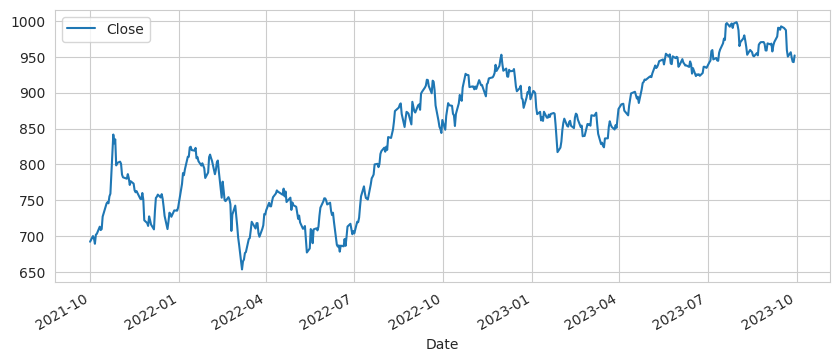

In [ ]:
# Let's see a historical view of the closing price
icici_df['Close'].plot(legend=True, figsize=(10,4))

<Axes: xlabel='Date'>

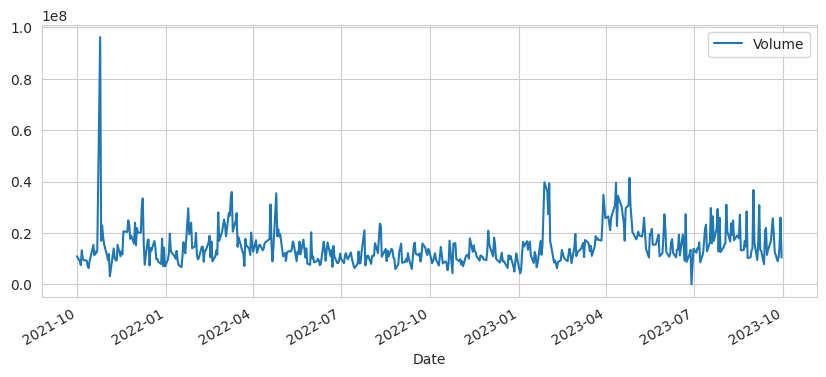

In [ ]:
# Now let's plot the total volume of stock being traded each day over the past year

icici_df['Volume'].plot(legend=True, figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day  
Let's go ahead and caculate the moving average  


For more info on the Moving Average(SMA & EMA) check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [ ]:
# Pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
MA_day = [10,20,50,100]

for ma in MA_day:
    column_name = '%s MA' %(str(ma))
    icici_df[column_name] = icici_df['Close'].rolling(ma).mean()


<Axes: xlabel='Date'>

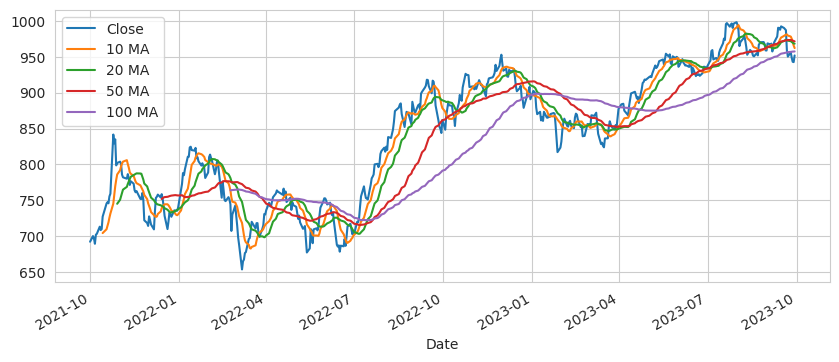

In [ ]:
icici_df[['Close','10 MA','20 MA','50 MA','100 MA']].plot(subplots=False,figsize=(10,4))

#### Section 2 - Daily Return Analysis


Now, that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock.


In order to do so, we need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns


<Axes: xlabel='Date'>

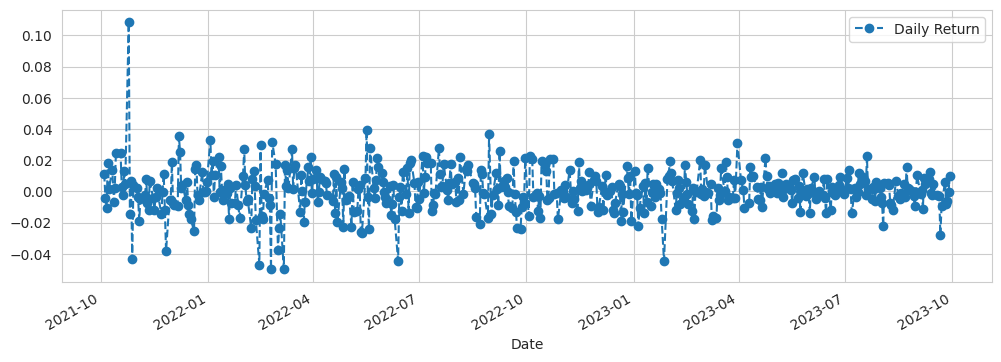

In [ ]:
# We'll use pct_change to find the percent change for each day
icici_df['Daily Return'] =  icici_df['Close'].pct_change()

# Lets plot the daily return percentage
icici_df['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

Great, now let's get an overall look at the average daily return using a histogram. By using seaborn to create both a histogram and kde plot on the same figure.

<Axes: >

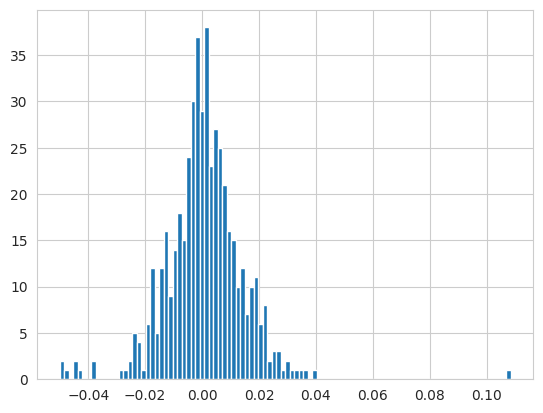

In [ ]:
# only with histogram
icici_df['Daily Return'].hist(bins=100)

<ipython-input-223-7c98a13cdddd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(icici_df['Daily Return'].dropna(), bins=100, color='magenta')


<Axes: xlabel='Daily Return', ylabel='Density'>

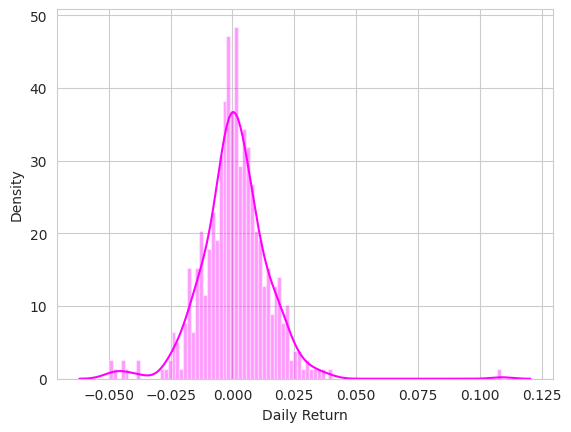

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(icici_df['Daily Return'].dropna(), bins=100, color='magenta')

In [ ]:
closingprice_df=  pd.DataFrame()

for symbol in symbols:
     closingprice_df[symbol] = yf.download(symbol, start=start_date, end=end_date)['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
closingprice_df.head(10)

,ICICIBANK.NS,HDFCBANK.NS,AXISBANK.NS
Date,,,
2021-10-01,692.349976,1582.699951,768.150024
2021-10-04,700.200012,1585.750000,779.000000
2021-10-05,697.099976,1595.449951,782.599976
2021-10-06,689.500000,1614.900024,778.950012
2021-10-07,702.200012,1610.500000,777.099976
2021-10-08,703.400024,1602.650024,781.950012
2021-10-11,713.299988,1633.800049,787.150024
2021-10-12,708.599976,1629.599976,797.150024
2021-10-13,709.950012,1639.400024,794.599976


In [ ]:
bank_returns = closingprice_df.pct_change()

In [ ]:
bank_returns.head()

,ICICIBANK.NS,HDFCBANK.NS,AXISBANK.NS
Date,,,
2021-10-01,NaN,NaN,NaN
2021-10-04,0.011338,0.001927,0.014125
2021-10-05,-0.004427,0.006117,0.004621
2021-10-06,-0.010902,0.012191,-0.004664
2021-10-07,0.018419,-0.002725,-0.002375


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.



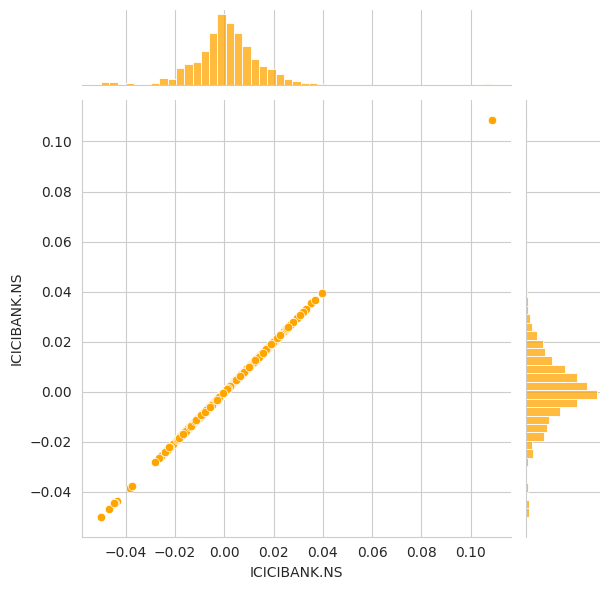

In [ ]:
# Comparing icici to itself should show a perfectly linear relationship
sns.jointplot(data=bank_returns, x='ICICIBANK.NS',y='ICICIBANK.NS', kind='scatter',color='orange')


So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

So let's go ahead and compare ICICI and hdfc the same way.

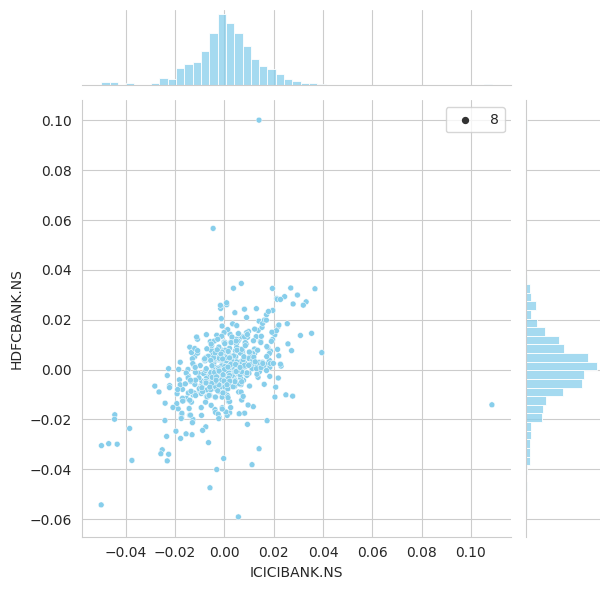

In [ ]:

sns.jointplot(data=bank_returns, x='ICICIBANK.NS',y='HDFCBANK.NS',size=8 ,kind='scatter',color='skyblue')

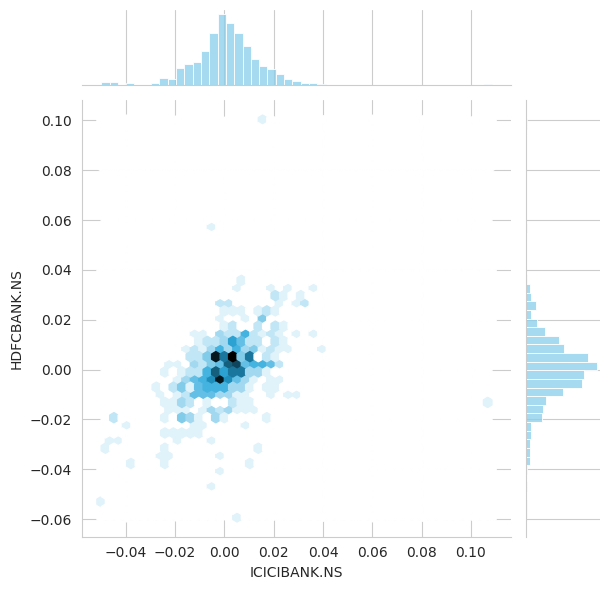

In [ ]:
sns.jointplot(data=bank_returns, x='ICICIBANK.NS',y='HDFCBANK.NS',kind='hex',color='skyblue')

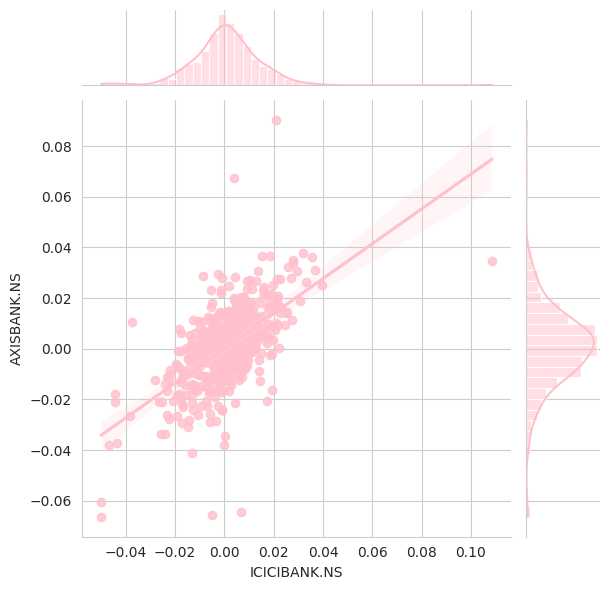

In [ ]:
 sns.jointplot(data=bank_returns, x='ICICIBANK.NS',y='AXISBANK.NS',kind='reg',color='pink')

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

Url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient



/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


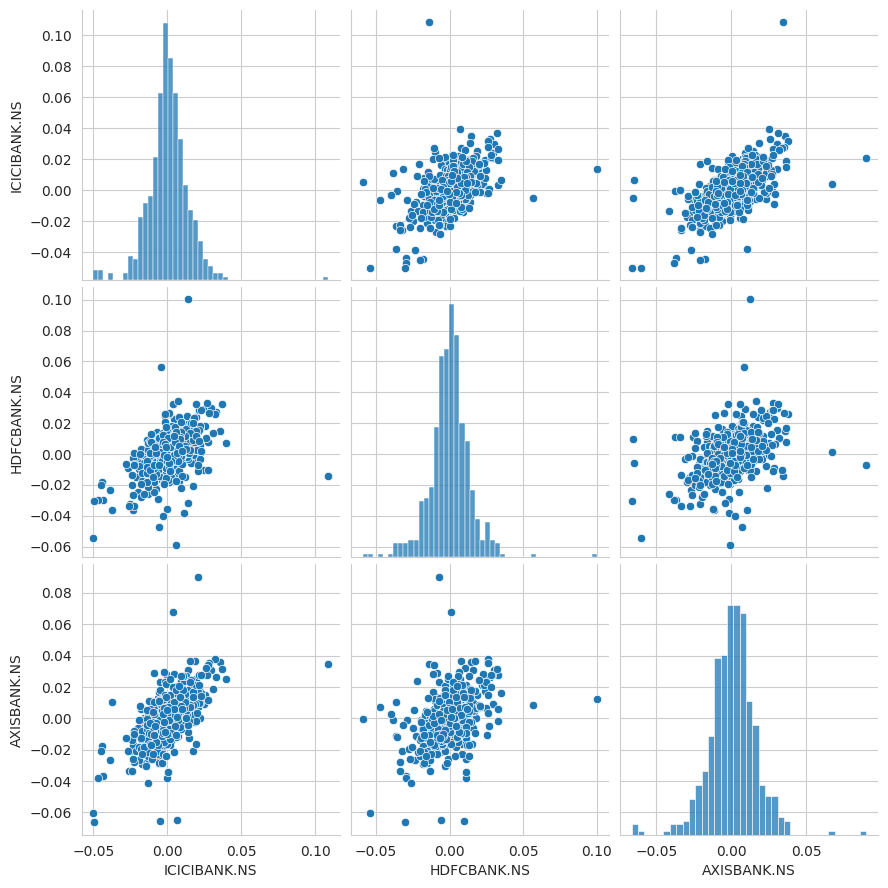

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(bank_returns.dropna(),size=3)

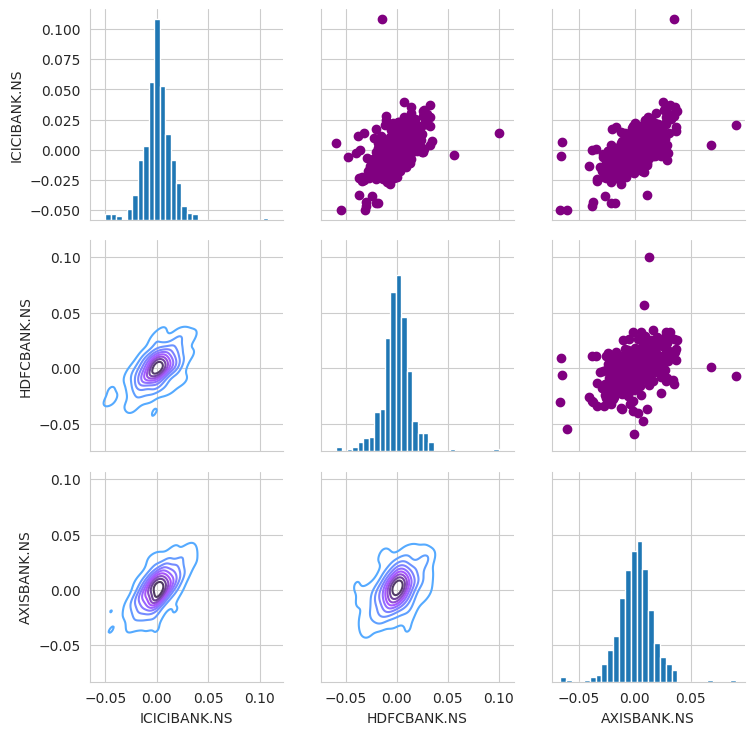

In [ ]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(bank_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we can also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between the stocks

<Axes: >

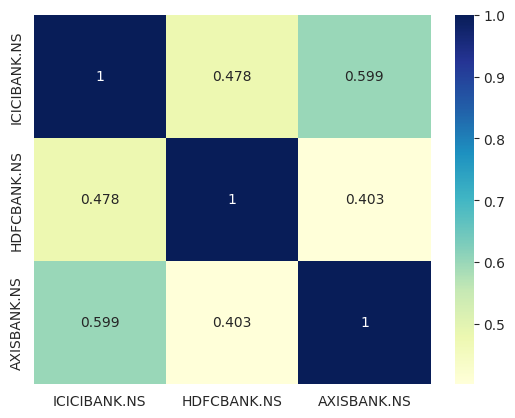

In [ ]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(bank_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<Axes: >

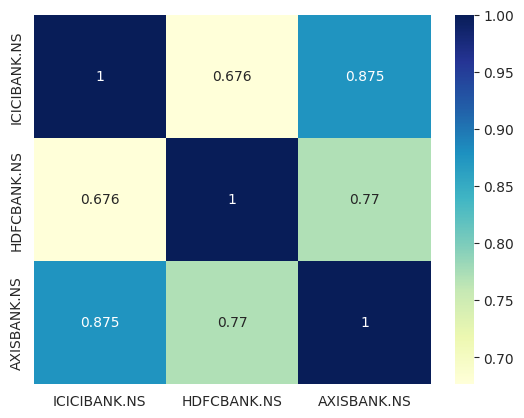

In [ ]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

#####  we see here numerically and visually that Axis and icici had the strongest correlation of daily stock return. It's also interesting to see that all the bank comapnies are positively correlated.

### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns(Risk).

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal bank_returns DataFrame
rets = bank_returns.dropna()

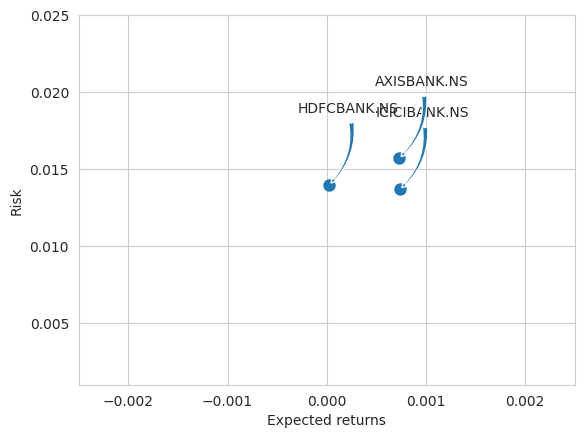

In [ ]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.0025,0.0025])
plt.ylim([0.001,0.025])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

By looking at the scatter plot we can say these stocks have lower risk and positive expected returns.

### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. There's several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

#### Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram  

<ipython-input-238-554f9e86294f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(  icici_df['Daily Return'].dropna(),bins=100,color='purple')


<Axes: xlabel='Daily Return', ylabel='Density'>

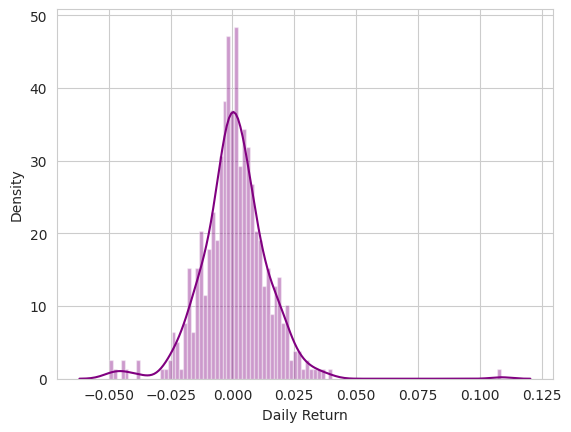

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(  icici_df['Daily Return'].dropna(),bins=100,color='purple')

In [ ]:
# The 0.05 empirical quantile of daily returns

rets["ICICIBANK.NS"].quantile(0.05)

-0.019013839688215326

In [ ]:
# The 0.05 empirical quantile of daily returns

rets["HDFCBANK.NS"].quantile(0.05)

-0.02151058308411947

In [ ]:
# The 0.05 empirical quantile of daily returns

rets["AXISBANK.NS"].quantile(0.05)

-0.0240194579368432

#### Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.


Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks and simulating stock prices with GBM model ie. geometric Brownian motion (GBM).

check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables


In [ ]:
rets.head()

,ICICIBANK.NS,HDFCBANK.NS,AXISBANK.NS
Date,,,
2021-10-04,0.011338,0.001927,0.014125
2021-10-05,-0.004427,0.006117,0.004621
2021-10-06,-0.010902,0.012191,-0.004664
2021-10-07,0.018419,-0.002725,-0.002375
2021-10-08,0.001709,-0.004874,0.006241


In [ ]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data
mu = rets.mean()['ICICIBANK.NS']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['ICICIBANK.NS']


# Now let's grab our mu (drift) from the expected return data we got
mu2 = rets.mean()['HDFCBANK.NS']

# Now let's grab the volatility of the stock from the std() of the average return
sigma2 = rets.std()['HDFCBANK.NS']

# Now let's grab our mu (drift) from the expected return data we got
mu3 = rets.mean()['AXISBANK.NS']

# Now let's grab the volatility of the stock from the std() of the average return
sigma3 = rets.std()['AXISBANK.NS']

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form our daily returns.

In [ ]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''

    # Define a price array
    price = np.zeros(days)
    price[0] = start_price

    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)

    # Run price array for number of days
    for x in range(1,days):

        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

    return price

Awesome! Now lets put above function to work.

In [ ]:

icici_df.head()

,Open,High,Low,Close,Adj Close,Volume,10 MA,20 MA,50 MA,100 MA,Daily Return
Date,,,,,,,,,,,
2021-10-01,693.000000,694.849976,687.900024,692.349976,677.004211,10935810,NaN,NaN,NaN,NaN,NaN
2021-10-04,697.049988,703.349976,694.049988,700.200012,684.680237,8976533,NaN,NaN,NaN,NaN,0.011338
2021-10-05,693.000000,699.000000,691.849976,697.099976,681.648865,7497208,NaN,NaN,NaN,NaN,-0.004427
2021-10-06,696.599976,705.000000,688.349976,689.500000,674.217346,13200810,NaN,NaN,NaN,NaN,-0.010902
2021-10-07,697.549988,704.950012,693.450012,702.200012,686.635864,10041549,NaN,NaN,NaN,NaN,0.018419


In [ ]:
# Define the ticker symbol for ICICI Bank stock
ticker_symbol = "ICICIBANK.NS"

# Create a ticker object
ticker = yf.Ticker(ticker_symbol)

# Get the historical data for the stock
historical_data = ticker.history(period="1d")

# Extract the last closing price
icici_last_close_price = historical_data["Close"].iloc[-1]

In [ ]:
print(icici_last_close_price)

951.9000244140625


In [ ]:
# Define the ticker symbol for ICICI Bank stock
ticker_symbol = "HDFCBANK.NS"

# Create a ticker object
ticker = yf.Ticker(ticker_symbol)

# Get the historical data for the stock
historical_data = ticker.history(period="1d")

# Extract the last closing price
hdfc_last_close_price = historical_data["Close"].iloc[-1]

In [ ]:
print(hdfc_last_close_price)

1526.300048828125


In [ ]:
# Define the ticker symbol for ICICI Bank stock
ticker_symbol = "AXISBANK.NS"

# Create a ticker object
ticker = yf.Ticker(ticker_symbol)

# Get the historical data for the stock
historical_data = ticker.history(period="1d")

# Extract the last closing price
axis_last_close_price = historical_data["Close"].iloc[-1]

In [ ]:
print(axis_last_close_price)

1036.699951171875


Text(0.5, 1.0, 'Monte Carlo Analysis for ICICIBank')

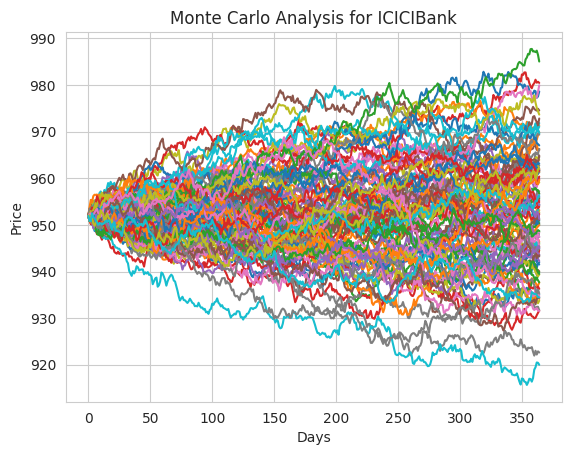

In [ ]:
start_price = icici_last_close_price

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for ICICIBank')

In [ ]:

hdfc_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-01,1583.000000,1589.000000,1565.250000,1582.699951,1546.771240,5564298
2021-10-04,1589.000000,1601.349976,1583.599976,1585.750000,1549.752075,3525514
2021-10-05,1592.000000,1597.500000,1576.250000,1595.449951,1559.231689,5128589
2021-10-06,1596.000000,1626.849976,1587.000000,1614.900024,1578.240234,9300415
2021-10-07,1626.599976,1627.699951,1607.000000,1610.500000,1573.940063,5632862


Text(0.5, 1.0, 'Monte Carlo Analysis for HDFC')

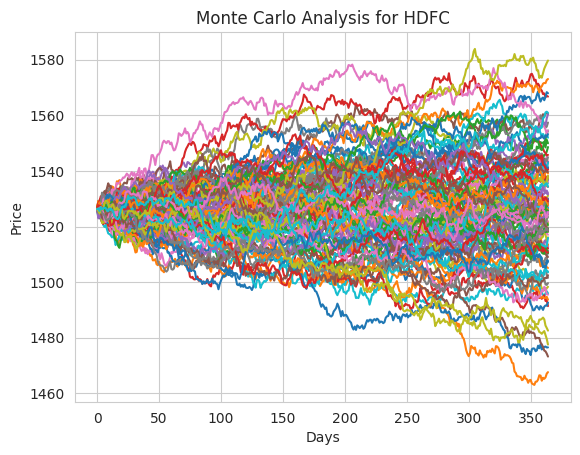

In [ ]:
start_price =  hdfc_last_close_price

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu2, sigma2))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for HDFC')

In [ ]:

axis_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-01,763.400024,771.700012,754.000000,768.150024,765.407898,6089895
2021-10-04,771.099976,781.150024,770.299988,779.000000,776.219116,5845527
2021-10-05,774.400024,784.000000,771.200012,782.599976,779.806213,3945224
2021-10-06,782.250000,794.200012,776.000000,778.950012,776.169312,5092479
2021-10-07,790.000000,790.150024,774.099976,777.099976,774.325928,6622698


Text(0.5, 1.0, 'Monte Carlo Analysis for Axis')

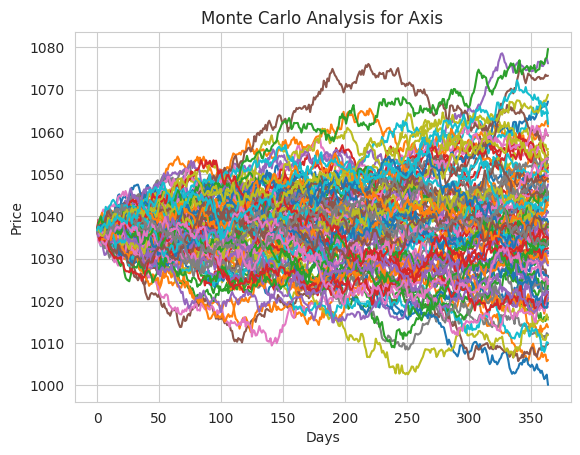

In [ ]:
start_price = axis_last_close_price

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu3, sigma3))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Axis')

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [ ]:
# Lets start with   ICICI stock price
start_price = icici_last_close_price

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

TypeError: ignored

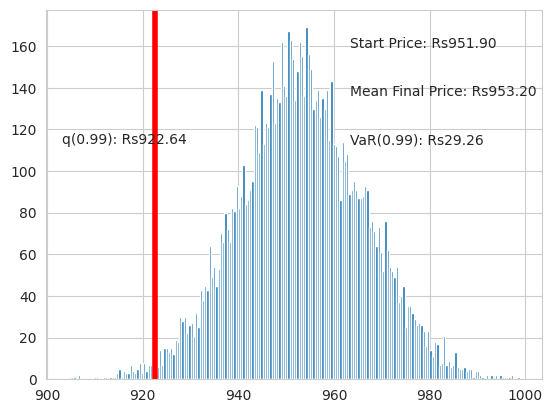

In [ ]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: Rs%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: Rs%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): Rs%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): Rs%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(s="Final price distribution for  ICICI bank after %s days" % days, weight='bold', color='Y')


Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk Stock, which looks to be 29.26 for every investment of
951.90  

This basically means for every initial  stock you purchase you're putting about 29.26 at risk 99% of the time from our Monte Carlo Simulation.


##### Now lets plot remaining Stocks to estimate the VaR with our Monte Carlo Simulation.

In [ ]:

start_price = hdfc_last_close_price

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu2,sigma2)[days-1]

TypeError: ignored

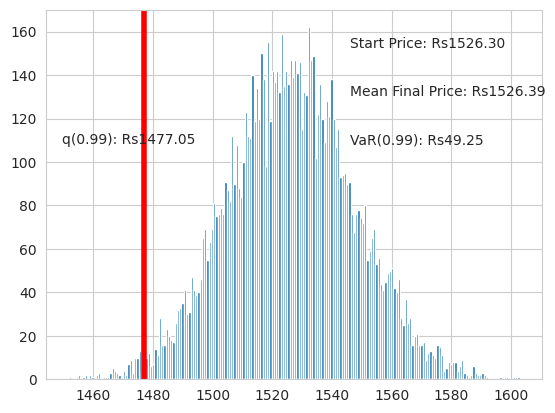

In [ ]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: Rs%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: Rs%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): Rs%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): Rs%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(s="Final price distribution for HDFC Bank after %s days" % days, weight='bold', color='G')

In [ ]:

start_price =  axis_last_close_price

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu3,sigma3)[days-1]

TypeError: ignored

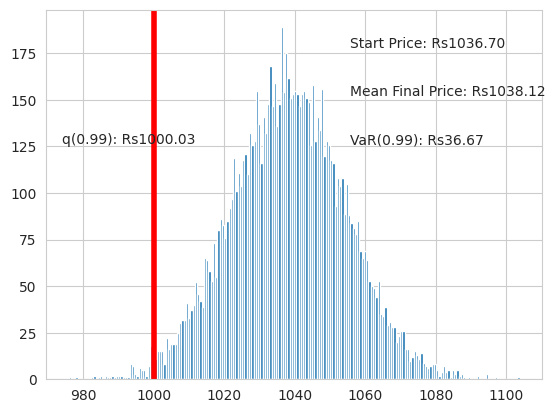

In [ ]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: Rs%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: Rs%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): Rs%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): Rs%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(s="Final price distribution for AXIS Bank after %s days" % days, weight='bold', color='G')

### Regression Analysis on ICICI Bank Stock using OHLC data and moving averages to predict next day opening price



 IDEA : predict the next day opening price on the basis of open(the price at which the stock opened on a specific day), high(highest price the stock had on a specific day), low(lowest price the stock had on a specific day), close(the price at which the stock closed on a day), volume(number of transaction that occured for this company. i.e. ICICI  bank on a specific day), 100DMA(5 days moving average of the opening price), 10DMA(10 days moving average of the opening price), 20DMA(20 days moving average of the opening price), 50DMA(50 days moving average of the opening price). A comparative study is also conducted to check which moving average contirbutes to better accuracy.

In [ ]:
icici_df.head()

,Open,High,Low,Close,Adj Close,Volume,10 MA,20 MA,50 MA,100 MA,Daily Return
Date,,,,,,,,,,,
2021-10-01,693.000000,694.849976,687.900024,692.349976,677.004211,10935810,NaN,NaN,NaN,NaN,NaN
2021-10-04,697.049988,703.349976,694.049988,700.200012,684.680237,8976533,NaN,NaN,NaN,NaN,0.011338
2021-10-05,693.000000,699.000000,691.849976,697.099976,681.648865,7497208,NaN,NaN,NaN,NaN,-0.004427
2021-10-06,696.599976,705.000000,688.349976,689.500000,674.217346,13200810,NaN,NaN,NaN,NaN,-0.010902
2021-10-07,697.549988,704.950012,693.450012,702.200012,686.635864,10041549,NaN,NaN,NaN,NaN,0.018419


In [ ]:
icici_df['Next day open'] = icici_df['Open'].shift(-1)

In [ ]:
icici_df.head()

,Open,High,Low,Close,Adj Close,Volume,10 MA,20 MA,50 MA,100 MA,Daily Return,Next day open
Date,,,,,,,,,,,,
2021-10-01,693.000000,694.849976,687.900024,692.349976,677.004211,10935810,NaN,NaN,NaN,NaN,NaN,697.049988
2021-10-04,697.049988,703.349976,694.049988,700.200012,684.680237,8976533,NaN,NaN,NaN,NaN,0.011338,693.000000
2021-10-05,693.000000,699.000000,691.849976,697.099976,681.648865,7497208,NaN,NaN,NaN,NaN,-0.004427,696.599976
2021-10-06,696.599976,705.000000,688.349976,689.500000,674.217346,13200810,NaN,NaN,NaN,NaN,-0.010902,697.549988
2021-10-07,697.549988,704.950012,693.450012,702.200012,686.635864,10041549,NaN,NaN,NaN,NaN,0.018419,706.000000


In [ ]:
icici_df.dropna(inplace=True)

In [ ]:
len(icici_df)

396

In [ ]:
y=icici_df['Next day open']

In [ ]:
print(y)

Date
2022-02-23    712.900024
2022-02-24    724.950012
2022-02-25    722.950012
2022-02-28    717.000000
2022-03-02    717.599976
                 ...    
2023-09-22    950.299988
2023-09-25    958.950012
2023-09-26    946.299988
2023-09-27    945.500000
2023-09-28    946.700012
Name: Next day open, Length: 396, dtype: float64


In [ ]:
X=icici_df.iloc[:, :-2]

In [ ]:
X.drop(columns=['Adj Close'], inplace=True)

In [ ]:
X.head()

,Open,High,Low,Close,Volume,10 MA,20 MA,50 MA,100 MA
Date,,,,,,,,,
2022-02-23,754.599976,756.400024,742.700012,744.599976,11624282,763.969995,781.202499,776.203999,764.043000
2022-02-24,712.900024,727.099976,702.299988,707.400024,28023104,754.159998,776.839999,775.307000,764.193501
2022-02-25,724.950012,739.299988,720.250000,730.049988,16935750,748.084998,774.284998,775.084999,764.492001
2022-02-28,722.950012,744.750000,715.400024,742.700012,20547432,746.984998,771.979999,775.372999,764.948001
2022-03-02,717.000000,724.950012,707.750000,714.849976,25252492,740.864996,767.207498,775.470999,765.201501


In [ ]:
X_train=X.iloc[:350]
X_test=X.iloc[350:]
y_train=y.iloc[:350]
y_test=y.iloc[350:]

In [ ]:
print(len(X_train))
print(len(X_test))

350
46


In [ ]:
print(X_train.iloc[:, 0:7])

                   Open         High         Low       Close    Volume  \
Date                                                                     
2022-02-23   754.599976   756.400024  742.700012  744.599976  11624282   
2022-02-24   712.900024   727.099976  702.299988  707.400024  28023104   
2022-02-25   724.950012   739.299988  720.250000  730.049988  16935750   
2022-02-28   722.950012   744.750000  715.400024  742.700012  20547432   
2022-03-02   717.000000   724.950012  707.750000  714.849976  25252492   
...                 ...          ...         ...         ...       ...   
2023-07-18   978.000000   987.950012  971.150024  975.450012  29709508   
2023-07-19   980.000000   980.000000  967.549988  973.450012  15994261   
2023-07-20   976.049988   998.150024  972.099976  995.599976  26487838   
2023-07-21   995.299988  1001.450012  988.799988  997.000000  16903003   
2023-07-24  1004.950012  1008.700012  990.099976  992.000000  21687719   

                 10 MA       20 MA  


In [ ]:
print(X_train['Date'])

KeyError: ignored

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# get 10 DMA model
DMA10 = LinearRegression()
DMA10.fit( X_train.iloc[:, 0:6], y_train)
DMA10_pred = DMA10.predict(X_test.iloc[:, 0:6])
acc10 = DMA10.score( X_test.iloc[:, 0:6], y_test)

# get 20 DMA model
DMA20 = LinearRegression()
DMA20.fit(X_train.iloc[:, [0, 1, 2, 3, 4, 6]], y_train)
DMA20_pred = DMA20.predict(X_test.iloc[:, [0, 1, 2, 3, 4, 6]])
acc20 = DMA20.score(X_test.iloc[:, [0, 1, 2, 3, 4, 6]], y_test)

# get 50 DMA model

DMA50 = LinearRegression()
DMA50.fit(X_train.iloc[:, [0, 1, 2, 3, 4, 7]], y_train)
DMA50_pred = DMA50.predict(X_test.iloc[:, [0, 1, 2, 3, 4, 7]])
acc50 = DMA50.score(X_test.iloc[:, [0, 1, 2, 3, 4, 7]], y_test)


# get 100 DMA model
DMA100 = LinearRegression()
DMA100.fit(X_train.iloc[:, [0, 1, 2, 3, 4, 8]], y_train)
DMA100_pred = DMA100.predict(X_test.iloc[:, [0, 1, 2, 3, 4, 8]])
acc100 = DMA100.score(X_test.iloc[:, [0, 1, 2, 3, 4, 8]], y_test)

DMAall = LinearRegression()
DMAall.fit(X_train.iloc[:, [0, 1, 2, 3, 4,6,7 ,8]], y_train)
DMAall_pred = DMAall.predict(X_test.iloc[:, [0, 1, 2, 3, 4,6,7, 8]])
accall = DMAall.score(X_test.iloc[:, [0, 1, 2, 3, 4,6,7, 8]], y_test)







In [ ]:
# get accuracy of the model

print("\nAccuracy for 10 DMA:"+str(acc10*100))
print("RMSE with 10 DMA:"+str(np.sqrt(mean_squared_error(y_test, DMA10_pred))))
print("\nAccuracy for 20 DMA:"+str(acc20*100))
print("RMSE with 20 DMA:"+str(np.sqrt(mean_squared_error(y_test, DMA20_pred))))
print("\nAccuracy for 50 DMA:"+str(acc50*100))
print("RMSE with 50 DMA:"+str(np.sqrt(mean_squared_error(y_test, DMA50_pred))))

print("\nAccuracy for 100 DMA:"+str(acc100*100))
print("RMSE with 100 DMA:"+str(np.sqrt(mean_squared_error(y_test, DMA100_pred))))


print("\nAccuracy for DMAall:"+str(accall*100))
print("RMSE with DMAall:"+str(np.sqrt(mean_squared_error(y_test, DMAall_pred))))






Accuracy for 10 DMA:89.41795188949399
RMSE with 10 DMA:5.141817923041135

Accuracy for 20 DMA:89.24514447663176
RMSE with 20 DMA:5.18363147501253

Accuracy for 50 DMA:88.624175262242
RMSE with 50 DMA:5.331179116481368

Accuracy for 100 DMA:89.17720704935377
RMSE with 100 DMA:5.199977961055013

Accuracy for DMAall:88.89776536634727
RMSE with DMAall:5.26668117550804


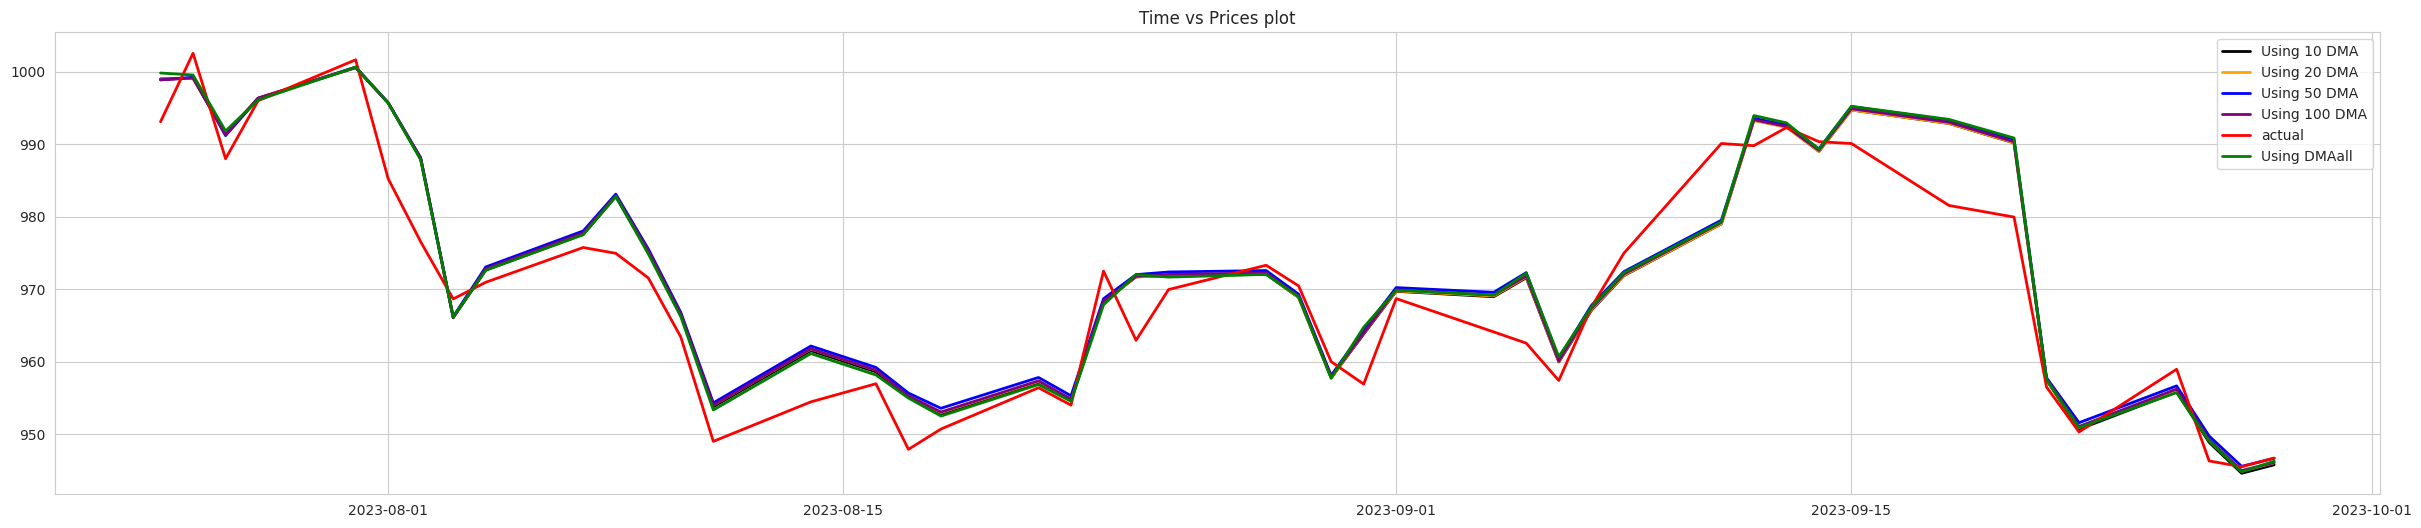

In [ ]:
plt.figure(figsize=(30, 6))
plt.plot(y_test.index, DMA10_pred, linewidth=2, color="black")
plt.plot(y_test.index, DMA20_pred, linewidth=2, color="orange")
plt.plot(y_test.index, DMA50_pred, linewidth=2, color="blue")
plt.plot(y_test.index, DMA100_pred, linewidth=2, color="purple")
plt.plot( y_test.index,  y_test, color="red", linewidth=2)
plt.plot(y_test.index, DMAall_pred, linewidth=2, color="green")
plt.legend(["Using 10 DMA","Using 20 DMA","Using 50 DMA","Using 100 DMA", "actual", "Using DMAall"])
plt.title("Time vs Prices plot")

plt.show()
